<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/multi_dimensional/notebook/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

fatal: destination path 'complex-systems-social-graph' already exists and is not an empty directory.


Printing the files' names in its "recommender_social_graph" directory:

In [2]:
import sys
print(sys.path)

['c:\\Users\\fabio\\Desktop\\complex-systems-social-graph\\recommender_social_graph\\multi_dimensional\\notebook', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310', '', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']


Importing mandatory methods

In [3]:
import copy
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
sys.path.append('.')
sys.path.append('../../')
%reload_ext autoreload
%autoreload 2
from multi_dimensional.graph_creation import create_graph
from multi_dimensional.test import print_graph
from multi_dimensional.abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from multi_dimensional.metrics import polarisation, sarle_bimodality, disagreement, feed_entropy
from multi_dimensional.content.content_recommender import simulate_epoch_content_recommender


Creation of a Graph with $50$ nodes, $3$ opinions

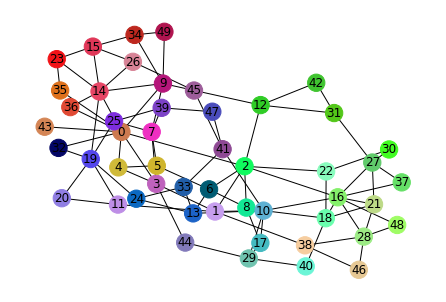

In [4]:
nodes, ops = 50, 3
G = create_graph(nodes, ops, [1], avg_friend = 2, hp_alpha=5, hp_beta=0)
print_graph(G, False)

Simulating 75 epochs with different content reccomenders (and without it)


In [45]:
from random import Random


random_G = copy.deepcopy(G)
random_G_base = copy.deepcopy(G)
normal_G = copy.deepcopy(G)
normal_G_base = copy.deepcopy(G)
nudge_G = copy.deepcopy(G)
nudge_G_base = copy.deepcopy(G)
nudge_opt_G = copy.deepcopy(G)
nudge_opt_G_base = copy.deepcopy(G)
similar_G = copy.deepcopy(G)
similar_G_base = copy.deepcopy(G)
unsimilar_G = copy.deepcopy(G)
unsimilar_G_base = copy.deepcopy(G)
random_param = {'n_post': 2}
normal_param = {'normal_mean': 0.5, 'normal_std': 0.1, 'n_post': 2}
nudge_param = {'nudge_goal': 0.5, 'n_post': 2}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.2}

estim_random_kalman, estim_random_base = 0.0, 0.0
estim_normal_kalman, estim_normal_base = 0.0, 0.0
estim_nudge_kalman, estim_nudge_base = 0.0, 0.0
estim_nudge_opt_kalman, estim_nudge_opt_base = 0.0, 0.0
estim_similar_kalman, estim_similar_base = 0.0, 0.0
estim_unsimilar_kalman, estim_unsimilar_base = 0.0, 0.0

for i in range(75):
  G = simulate_epoch_updated(G, ops, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, ops, 50, 50, strat_param=random_param, estim_strategy='kalman')
  random_G_base = simulate_epoch_content_recommender(random_G_base, ops, 50, 50, strat_param=random_param, estim_strategy='base')
  normal_G = simulate_epoch_content_recommender(normal_G, ops, 50, 50, strategy="normal", strat_param=normal_param, estim_strategy='kalman')
  normal_G_base = simulate_epoch_content_recommender(normal_G_base, ops, 50, 50, strategy="normal", strat_param=normal_param, estim_strategy='base')
  nudge_G = simulate_epoch_content_recommender(nudge_G, ops, 50, 50, strategy="nudge", strat_param=nudge_param, estim_strategy='kalman')
  nudge_G_base = simulate_epoch_content_recommender(nudge_G_base, ops, 50, 50, strategy="nudge", strat_param=nudge_param, estim_strategy='base')
  nudge_opt_G = simulate_epoch_content_recommender(nudge_opt_G, ops, 50, 50, strategy="nudge_opt", strat_param=nudge_param, estim_strategy='kalman')
  nudge_opt_G_base = simulate_epoch_content_recommender(nudge_opt_G_base, ops, 50, 50, strategy="nudge_opt", strat_param=nudge_param, estim_strategy='base')
  similar_G = simulate_epoch_content_recommender(similar_G, ops, 50, 50,  strategy="similar", strat_param=similar_param, estim_strategy='kalman')
  similar_G_base = simulate_epoch_content_recommender(similar_G_base, ops, 50, 50,  strategy="similar", strat_param=similar_param, estim_strategy='base')
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, ops, 50, 50, strategy="unsimilar", strat_param=unsimilar_param, estim_strategy='kalman')
  unsimilar_G_base = simulate_epoch_content_recommender(unsimilar_G_base, ops, 50, 50, strategy="unsimilar", strat_param=unsimilar_param, estim_strategy='base')

  es_random_kalman = nx.get_node_attributes(random_G, 'estimated_opinion')
  random_kalman = nx.get_node_attributes(random_G, 'opinion')
  es_random_base = nx.get_node_attributes(random_G_base, 'estimated_opinion')
  random_base = nx.get_node_attributes(random_G_base, 'opinion')
  diff_kalman, diff_base = 0.0, 0.0
  for node in range(nodes):
    node_kalman, node_base = 0.0, 0.0
    for op in range(ops):
      diff_kalman += abs(es_random_kalman[node][op] - random_kalman[node][op])
      diff_base += abs(es_random_base[node][op] - random_base[node][op])
    node_kalman += diff_kalman / ops
    node_base += diff_base / ops
  estim_random_kalman += node_kalman / nodes
  estim_random_base += node_base / nodes


  es_normal_kalman = nx.get_node_attributes(normal_G, 'estimated_opinion')
  normal_kalman = nx.get_node_attributes(normal_G, 'opinion')
  es_normal_base = nx.get_node_attributes(normal_G_base, 'estimated_opinion')
  normal_base = nx.get_node_attributes(normal_G_base, 'opinion')
  diff_kalman, diff_base = 0.0, 0.0
  for node in range(nodes):
    node_kalman, node_base = 0.0, 0.0
    for op in range(ops):
      diff_kalman += abs(es_normal_kalman[node][op] - normal_kalman[node][op])
      diff_base += abs(es_normal_base[node][op] - normal_base[node][op])
    node_kalman += diff_kalman / ops
    node_base += diff_base / ops
  estim_normal_kalman += node_kalman / nodes
  estim_normal_base += node_base / nodes


  es_nudge_kalman = nx.get_node_attributes(nudge_G, 'estimated_opinion')
  nudge_kalman = nx.get_node_attributes(nudge_G, 'opinion')
  es_nudge_base = nx.get_node_attributes(nudge_G_base, 'estimated_opinion')
  nudge_base = nx.get_node_attributes(nudge_G_base, 'opinion')
  diff_kalman, diff_base = 0.0, 0.0
  for node in range(nodes):
    node_kalman, node_base = 0.0, 0.0
    for op in range(ops):
      diff_kalman += abs(es_nudge_kalman[node][op] - nudge_kalman[node][op])
      diff_base += abs(es_nudge_base[node][op] - nudge_base[node][op])
    node_kalman += diff_kalman / ops
    node_base += diff_base / ops
  estim_nudge_kalman += node_kalman / nodes
  estim_nudge_base += node_base / nodes


  es_nudge_opt_kalman = nx.get_node_attributes(nudge_opt_G, 'estimated_opinion')
  nudge_opt_kalman = nx.get_node_attributes(nudge_opt_G, 'opinion')
  es_nudge_opt_base = nx.get_node_attributes(nudge_opt_G_base, 'estimated_opinion')
  nudge_opt_base = nx.get_node_attributes(nudge_opt_G_base, 'opinion')
  diff_kalman, diff_base = 0.0, 0.0
  for node in range(nodes):
    node_kalman, node_base = 0.0, 0.0
    for op in range(ops):
      diff_kalman += abs(es_nudge_opt_kalman[node][op] - nudge_opt_kalman[node][op])
      diff_base += abs(es_nudge_opt_base[node][op] - nudge_opt_base[node][op])
    node_kalman += diff_kalman / ops
    node_base += diff_base / ops
  estim_nudge_opt_kalman += node_kalman / nodes
  estim_nudge_opt_base += node_base / nodes


  es_similar_kalman = nx.get_node_attributes(similar_G, 'estimated_opinion')
  similar_kalman = nx.get_node_attributes(similar_G, 'opinion')
  es_similar_base = nx.get_node_attributes(similar_G_base, 'estimated_opinion')
  similar_base = nx.get_node_attributes(similar_G_base, 'opinion')
  diff_kalman, diff_base = 0.0, 0.0
  for node in range(nodes):
    node_kalman, node_base = 0.0, 0.0
    for op in range(ops):
      diff_kalman += abs(es_similar_kalman[node][op] - similar_kalman[node][op])
      diff_base += abs(es_similar_base[node][op] - similar_base[node][op])
    node_kalman += diff_kalman / ops
    node_base += diff_base / ops
  estim_similar_kalman += node_kalman / nodes
  estim_similar_base += node_base / nodes


  es_unsimilar_kalman = nx.get_node_attributes(unsimilar_G, 'estimated_opinion')
  unsimilar_kalman = nx.get_node_attributes(unsimilar_G, 'opinion')
  es_unsimilar_base = nx.get_node_attributes(unsimilar_G_base, 'estimated_opinion')
  unsimilar_base = nx.get_node_attributes(unsimilar_G_base, 'opinion')
  diff_kalman, diff_base = 0.0, 0.0
  for node in range(nodes):
    node_kalman, node_base = 0.0, 0.0
    for op in range(ops):
      diff_kalman += abs(es_unsimilar_kalman[node][op] - unsimilar_kalman[node][op])
      diff_base += abs(es_unsimilar_base[node][op] - unsimilar_base[node][op])
    node_kalman += diff_kalman / ops
    node_base += diff_base / ops
  estim_unsimilar_kalman += node_kalman / nodes
  estim_unsimilar_base += node_base / nodes

print(estim_random_kalman, estim_random_base)
print(estim_normal_kalman, estim_normal_base)
print(estim_nudge_kalman, estim_nudge_base)
print(estim_nudge_opt_kalman, estim_nudge_opt_base)
print(estim_similar_kalman, estim_similar_base)
print(estim_unsimilar_kalman, estim_unsimilar_base)

15.591078801228411 14.33052863509139
7.418692264295598 17.270254357491524
7.106455843791577 17.03928326999049
6.28153624262332 17.015200360439707
0.0050458557142749215 3.8900251791742977
0.0060326421997599685 3.8799059115146033


Printing graphs

No recommender


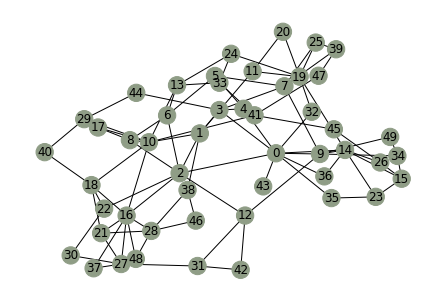

Random
Kalman


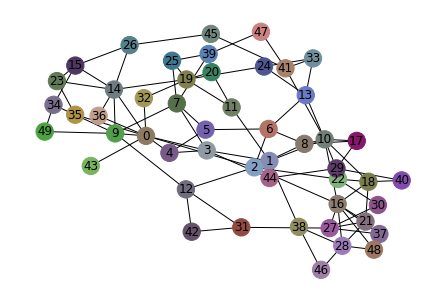

Base


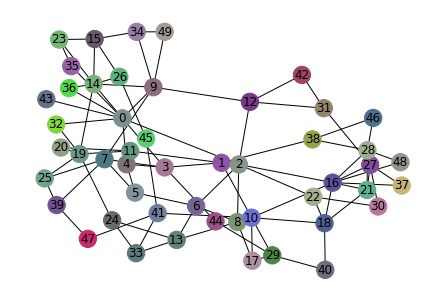

Normal
Kalman


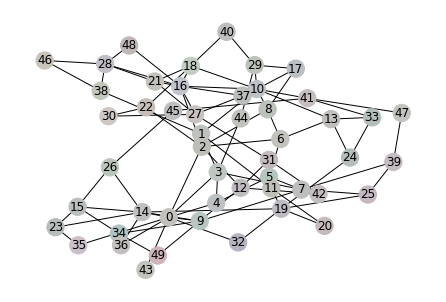

Base


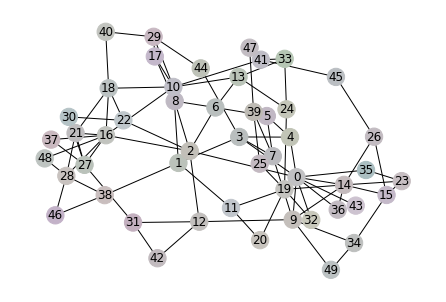

Nudge
Kalman


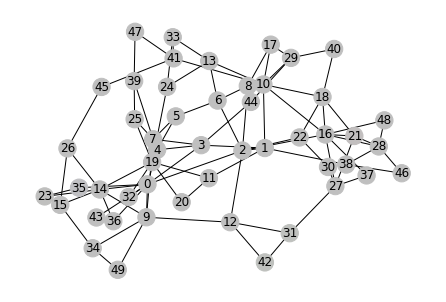

Base


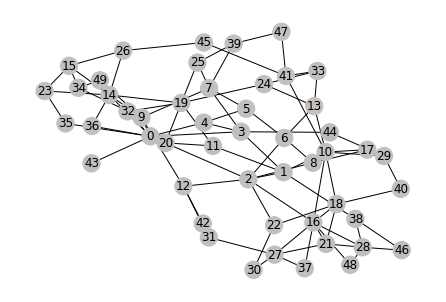

Nudge Opt
Kalman


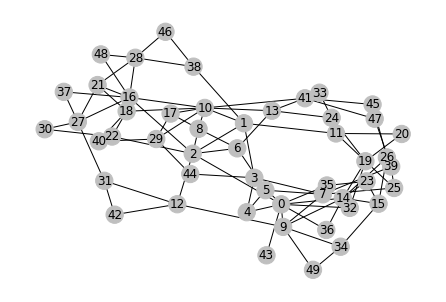

Base


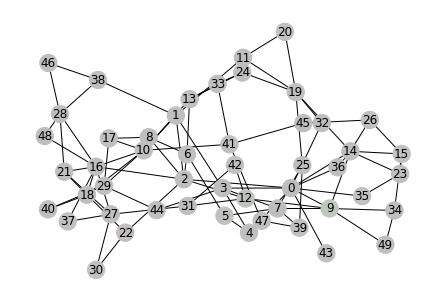

Similar
Kalman


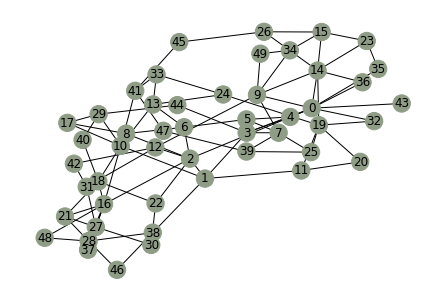

Base


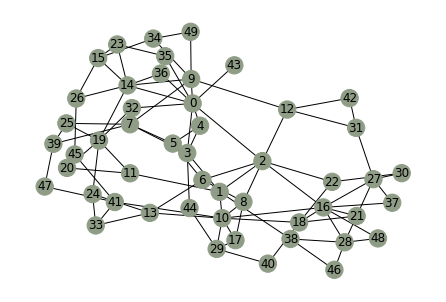

Unsimilar
Kalman


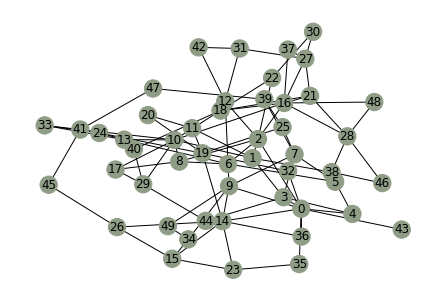

Base


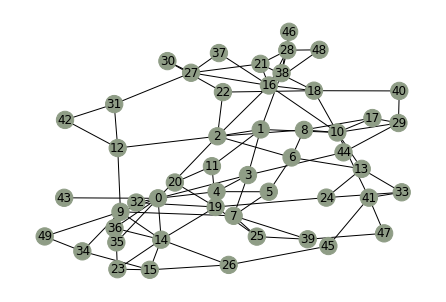

In [46]:
print('No recommender')
print_graph(G, False)
print('Random')
print('Kalman')
print_graph(random_G, False)
print('Base')
print_graph(random_G_base, False)
print('Normal')
print('Kalman')
print_graph(normal_G, False)
print('Base')
print_graph(normal_G_base, False)
print('Nudge')
print('Kalman')
print_graph(nudge_G, False)
print('Base')
print_graph(nudge_G_base, False)
print('Nudge Opt')
print('Kalman')
print_graph(nudge_opt_G, False)
print('Base')
print_graph(nudge_opt_G_base, False)
print('Similar')
print('Kalman')
print_graph(similar_G, False)
print('Base')
print_graph(similar_G_base, False)
print("Unsimilar")
print('Kalman')
print_graph(unsimilar_G, False)
print('Base')
print_graph(unsimilar_G_base, False)

Polarisation


In [47]:
print('No recommender:\t\t' + str(polarisation(G)))
print('Random Kalman:\t\t' + str(polarisation(random_G)) + '\t\tRandom Base:\t' + str(polarisation(random_G_base)))
print('Normal Kalman:\t\t' + str(polarisation(normal_G)) + '\t\tNormal Base:\t' + str(polarisation(normal_G_base)))
print('Nudge Kalman:\t\t' + str(polarisation(nudge_G)) + '\t\tNudge Base:\t' + str(polarisation(nudge_G_base)))
print('Nudge Opt Kalman:\t' + str(polarisation(nudge_opt_G)) + '\t\tNudge Opt Base:\t' + str(polarisation(nudge_opt_G_base)))
print('Similar Kalman:\t\t' + str(polarisation(similar_G)) + '\t\tSimilar Base:\t' + str(polarisation(similar_G_base)))
print('Unsimilar Kalman:\t' + str(polarisation(unsimilar_G)) + '\t\tUnsimilar Base:\t' + str(polarisation(unsimilar_G_base)))

No recommender:		7.652511521127892e-07
Random Kalman:		40.490375304949815		Random Base:	43.48200809213753
Normal Kalman:		0.1089855146116625		Normal Base:	0.1422791844087159
Nudge Kalman:		0.000513309457807698		Nudge Base:	0.004514152597706711
Nudge Opt Kalman:	4.873927697601754e-05		Nudge Opt Base:	0.004913300447464741
Similar Kalman:		1.2192452971682144e-06		Similar Base:	1.3413195333322747e-06
Unsimilar Kalman:	3.267453962507716e-06		Unsimilar Base:	2.29900013848372e-06


Disagreement


In [19]:
print('No recommender:\t\t' + str(sum(disagreement(G).values())))
print('Random Kalman:\t\t' + str(sum(disagreement(random_G).values())) + '\t\tRandom Base:\t' + str(sum(disagreement(random_G_base).values())))
print('Normal Kalman:\t\t' + str(sum(disagreement(normal_G).values())) + '\t\tNormal Base:\t' + str(sum(disagreement(normal_G_base).values())))
print('Nudge Kalman:\t\t' + str(sum(disagreement(nudge_G).values())) +'\t\tNudge Base:\t' + str(sum(disagreement(nudge_G_base).values())))
print('Nudge Opt Kalman:\t' + str(sum(disagreement(nudge_opt_G).values())) +'\t\tNudge Opt Base:\t' + str(sum(disagreement(nudge_opt_G_base).values())))
print('Similar Kalman:\t' + str(sum(disagreement(similar_G).values())) +'\t\tSimilar Base:\t' + str(sum(disagreement(similar_G_base).values())))
print('Unsimilar Kalman:\t' + str(sum(disagreement(unsimilar_G).values())) +'\t\tUnsimilar Base:\t' + str(sum(disagreement(unsimilar_G_base).values())))

No recommender:		7.746819179444951
Random Kalman:		31.143963219519808		Random Base:	27.54954448056064
Normal Kalman:		5.7442273007467275		Normal Base:	6.37691453213906
Nudge Kalman:		0.18380221936094673		Nudge Base:	1.012344945372229
Nudge Opt Kalman:	0.18222609796961575		Nudge Opt Base:	4.186841907459117
Similar Kalman:	10.423725287080996		Similar Base:	7.212768787290259
Unsimilar Kalman:	13.122890720915398		Unsimilar Base:	11.15852656559139


Sarle bimodality

In [23]:
print('No recommender:\t\t' + str(sarle_bimodality(G, ops)))
print('Random Kalman:\t\t' + str(sarle_bimodality(random_G, ops)) + '\nRandom Base:\t\t' + str(sarle_bimodality(random_G_base, ops)))
print('Normal Kalman:\t\t' + str(sarle_bimodality(normal_G, ops)) + '\nNormal Base:\t\t' + str(sarle_bimodality(normal_G_base, ops)))
print('Nudge Kalman:\t\t' + str(sarle_bimodality(nudge_G, ops)) + '\nNudge Base:\t\t' + str(sarle_bimodality(nudge_G_base, ops)))
print('Nudge Opt Kalman:\t' + str(sarle_bimodality(nudge_opt_G, ops)) + '\nNudge Opt Base:\t\t' + str(sarle_bimodality(nudge_opt_G_base, ops)))
print('Similar Kalman:\t\t' + str(sarle_bimodality(similar_G, ops)) + '\nSimilar Base:\t\t' + str(sarle_bimodality(similar_G_base, ops)))
print('Unsimilar Kalman:\t' + str(sarle_bimodality(unsimilar_G, ops)) + '\nUnsimilar Base:\t\t' + str(sarle_bimodality(unsimilar_G_base, ops)))

No recommender:		[-1.8486785526036096, -0.6530849192201805, 11.138844834571886]
Random Kalman:		[-1.2948590962742625, -2.3072223726306214, -8.999010164672198]
Random Base:		[-19.887369765322177, -10.606869580134907, 2.9813756735087824]
Normal Kalman:		[1.1870768278357158, -2.181782971123811, 1.167286292941157]
Normal Base:		[-1.038499827384832, 4.482346604047111, -3.3894168787229986]
Nudge Kalman:		[1.2357085105699486, 0.9853900352120784, 0.9922631136610289]
Nudge Base:		[0.6935255767647994, 0.5255312651191906, 0.6416718910131215]
Nudge Opt Kalman:	[0.5499824849559037, 0.9253673012391358, 0.47249789145257715]
Nudge Opt Base:		[1.0200472542609147, 1.077243673125301, 1.0240811624695896]
Similar Kalman:		[-1.640938193660223, -0.839072776510396, -1.0331369106884105]
Similar Base:		[1.2104755030430985, -0.8780273093644154, -6.491918736847001]
Unsimilar Kalman:	[-2.0035354526033355, -0.7051007963081299, -1.1026893700098381]
Unsimilar Base:		[-1.4718839284934382, -0.8531011950466525, 2.345768

Feed Entropy

In [33]:
print('No recommender:\t\t' + str(sum(feed_entropy(G, ops).values()) / nodes))
print('Random Kalman:\t\t' + str(sum(feed_entropy(random_G, ops).values()) / nodes) + '\nRandom Base:\t\t' + str(sum(feed_entropy(random_G_base, ops).values()) / nodes))
print('Normal Kalman:\t\t' + str(sum(feed_entropy(normal_G, ops).values()) / nodes) + '\nNormal Base:\t\t' + str(sum(feed_entropy(normal_G_base, ops).values()) / nodes))
print('Nudge Kalman:\t\t' + str(sum(feed_entropy(nudge_G, ops).values()) / nodes) + '\nNudge Base:\t\t' + str(sum(feed_entropy(nudge_G_base, ops).values()) / nodes))
print('Nudge Opt Kalman:\t' + str(sum(feed_entropy(nudge_opt_G, ops).values()) / nodes) + '\nNudge Opt Base:\t\t' + str(sum(feed_entropy(nudge_opt_G_base, ops).values()) / nodes))
print('Similar Kalman:\t\t' + str(sum(feed_entropy(similar_G, ops).values()) / nodes) + '\nSimilar Base:\t\t' + str(sum(feed_entropy(similar_G_base, ops).values()) / nodes))
print('Unsimilar Kalman:\t' + str(sum(feed_entropy(unsimilar_G, ops).values()) / nodes) + '\nUnsimilar Base:\t\t' + str(sum(feed_entropy(unsimilar_G_base, ops).values()) / nodes))

No recommender:		nan
Random Kalman:		0.8870011645483875
Random Base:		0.9005098201555266
Normal Kalman:		0.4843472548488087
Normal Base:		0.485389709756121
Nudge Kalman:		0.47564848017253397
Nudge Base:		0.4799643708622092
Nudge Opt Kalman:	0.4783486692861725
Nudge Opt Base:		0.4834175980847195
Similar Kalman:		0.34318019429118946
Similar Base:		0.32961582208411455
Unsimilar Kalman:	0.36982093190658477
Unsimilar Base:		0.38859514850878896
